In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 各入力ベクトルの初期値宣言
x_1 = np.matrix([[0], [0]])
x_2 = np.matrix([[1], [0]])
x_3 = np.matrix([[0], [1]])
x_4 = np.matrix([[1], [1]])
X = [x_1, x_2, x_3, x_4]

# パラメータの宣言
t_1 = 0
t_2 = 1
t_3 = 1
t_4 = 0
T = [t_1, t_2, t_3, t_4]

# 学習ベクトルの初期値
w_1 = np.matrix([[0], [1]])
W = [w_1]

# 発火したパーセプトロンの記録
Z = []

# 学習率
a = 1

# 繰り返し処理を行う回数
REPEAT = 20

In [3]:
for i in range(REPEAT):
    if int(W[i % len(X)].T * X[i % len(X)]) > 0:
        z = 1
    else:
        z = 0
    Z.append(z)
    w = W[i % len(X)] -a * (z - T[i % len(X)]) * X[i % len(X)]
    W.append(w)

In [4]:
(5 - 1) % 4 + 1

1

In [5]:
W[0][0]

matrix([[0]])

In [6]:
int(W[0][1])

1

In [7]:
len(W)

21

In [8]:
x_train = []
x_count = []
y_count = []

for i in range(len(W)):
    x_train.append(i + 1)
    x_count.append(int(W[i][0]))
    y_count.append(int(W[i][1]))
print("計算回数: ", x_train, "length:", len(x_train))
print("xの歩み値: ", x_count, "length:", len(x_count))
print("yの歩み値: ", y_count, "length:", len(y_count))

計算回数:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21] length: 21
xの歩み値:  [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0] length: 21
yの歩み値:  [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0] length: 21


<Figure size 432x288 with 0 Axes>

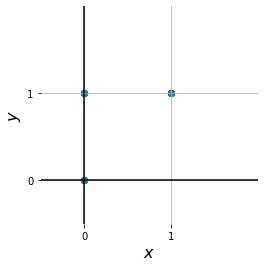

In [9]:
fig = plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()

# 格子点を表示
ax.grid()

# 軸ラベルの設定
ax.set_xlabel("$x$", fontsize = 16)
ax.set_ylabel("$y$", fontsize = 16)

# 軸範囲の設定
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 2)

ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, 2, 1))

ax.set_aspect('equal')

for border in ['left', 'top', 'right', 'bottom']:
    ax.spines[border].set_visible(False)

plt.hlines(0, -10, 10, color='black')
plt.vlines(0, -10, 10, color='black')

ax.scatter(x_count, y_count)
plt.show()

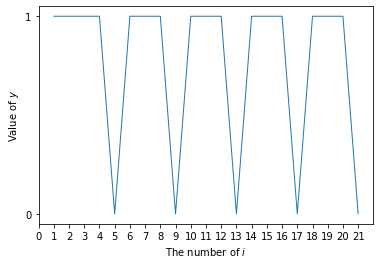

In [10]:
# 重みベクトルのyの歩み値
plt.plot(x_train, y_count, linewidth=1)
plt.xticks(np.arange(0, len(x_train) + 1, 1))
plt.yticks(np.arange(0, 2, 1))
# plt.ylim(0, 1.2)
plt.xlabel("The number of $i$")
plt.ylabel("Value of $y$")
plt.show()

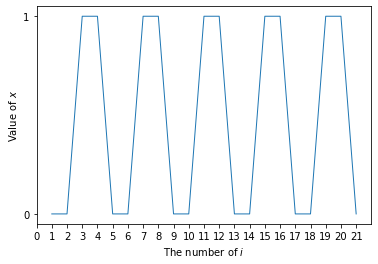

In [11]:
# 重みベクトルのxの歩み値
plt.plot(x_train, x_count, linewidth=1)
plt.xticks(np.arange(0, len(x_train) + 1, 1))
plt.yticks(np.arange(0, 2, 1))
# plt.ylim(0, 1.2)
plt.xlabel("The number of $i$")
plt.ylabel("Value of $x$")
plt.show()

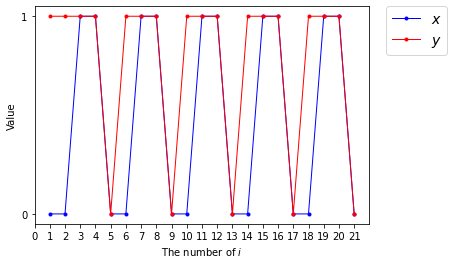

In [12]:
plt.plot(x_train, x_count, linewidth=1, color='b', label='$x$', marker='.')
plt.plot(x_train, y_count, linewidth=1, color='red', label='$y$', marker='.')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.xticks(np.arange(0, len(x_train) + 1, 1))
plt.yticks(np.arange(0, 2, 1))
plt.xlabel("The number of $i$")
plt.ylabel("Value")
plt.show()

In [14]:
x_count = []
loss = []
for i in range(len(Z)):
    x_count.append(i + 1)
    loss.append( Z[i] - T[i % len(T)] )
print(x_count)
print(loss)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, 1]


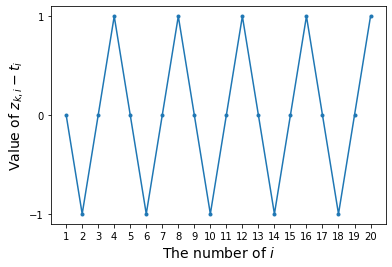

In [22]:
plt.xticks(np.arange(0, len(x_count) + 1, 1))
plt.yticks(np.arange(-1, 1.2, 1))
plt.xlabel("The number of $i$", size=14)
plt.ylabel("Value of $z_{k,i}-t_{i}$", size=14)
plt.plot(x_count, loss, marker='.')
plt.show()

In [16]:
# Zの出力
z_count = []
for i in range(len(Z)):
    z_count.append(i + 1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


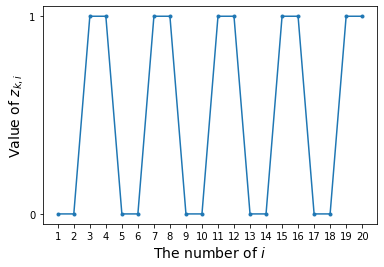

In [20]:
plt.xticks(np.arange(0, len(z_count) + 1, 1))
plt.yticks(np.arange(-1, 1.2, 1))
plt.xlabel("The number of $i$", size=14)
plt.ylabel("Value of $z_{k,i}$", size=14)
plt.plot(z_count, Z, marker='.')
plt.show()